In [2]:
import cv2
import numpy as np
import os

In [3]:
image_dir = 'archive2/deepfashion2/images'

In [4]:
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Preprocess all images
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)
    processed_image = preprocess_image(image_path)
    # Save or use the processed_image as needed

In [5]:
import pandas as pd

In [6]:
csv_file = 'archive2/deepfashion2/styles.csv'

In [7]:
annotations_df = pd.read_csv(csv_file, delimiter=';') 


In [8]:
# Create lists to store image IDs, bounding boxes, and labels
image_ids = []
bounding_boxes = []
labels = []

In [9]:
# Check if required columns exist
required_columns = ['image_id', 'bbox_xmin', 'bbox_ymin', 'bbox_xmax', 'bbox_ymax', 'category']
if all(col in annotations_df.columns for col in required_columns):
    # Iterate over the rows in the DataFrame
    for _, row in annotations_df.iterrows():
        try:
            # Extract image ID, bounding box, and label
            image_id = row['image_id']
            bbox = [row['bbox_xmin'], row['bbox_ymin'], row['bbox_xmax'], row['bbox_ymax']]
            label = row['category']

            # Append the data to respective lists
            image_ids.append(image_id)
            bounding_boxes.append(bbox)
            labels.append(label)
        except KeyError as e:
            print(f"Missing data in row {_}: {e}")
else:
    print("Error: Missing required columns in the CSV file.")

# Example of how to use the parsed data
for i in range(len(image_ids)):
    print(f"Image ID: {image_ids[i]}")
    print(f"Bounding Box: {bounding_boxes[i]}")
    print(f"Label: {labels[i]}")

Error: Missing required columns in the CSV file.


In [10]:
import tensorflow as tf

In [11]:
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize to [0, 1]
    return image

def load_data(image_paths, labels):
    images = [load_image(p) for p in image_paths]
    labels = tf.convert_to_tensor(labels)
    return tf.data.Dataset.from_tensor_slices((images, labels))

In [12]:
import os
print(os.path.exists('archive2/deepfashion2/images'))


True


In [13]:
import pandas as pd

# Load the CSV file
annotations_df = pd.read_csv(csv_file, on_bad_lines='skip')

# Print column names
print("Columns in the CSV file:", annotations_df.columns)


Columns in the CSV file: Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [14]:
import pandas as pd
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [15]:
def load_data(image_dir, csv_file, image_size=(224, 224)):
    # Load annotations from CSV
    annotations_df = pd.read_csv(csv_file, on_bad_lines='skip')
    
    # Print columns to find the correct names
    print("Columns in the CSV file:", annotations_df.columns)
    
    images = []
    labels = []
    
    # Iterate over the DataFrame
    for _, row in annotations_df.iterrows():
        # Construct the image filename based on the 'id' column
        image_filename = f"{row['id']}.jpg"  # Adjust if your image filenames have a different extension or format
        image_path = os.path.join(image_dir, image_filename)  # Construct full path
        
        # Load image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to load image at {image_path}")
            continue
        
        # Resize image to the desired size
        image = cv2.resize(image, image_size)
        
        # Use a relevant column for the label; you might choose 'masterCategory', 'subCategory', etc.
        label = annotations_df['articleType']  # Adjust as needed
        
        # Append image and label
        images.append(image)
        labels.append(label)
    
    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels


In [16]:
image_dir = '/Users/lingesh_08/Desktop/VS CODE/archive2/deepfashion2/images'
csv_file = '/Users/lingesh_08/Desktop/VS CODE/archive2/deepfashion2/styles.csv'

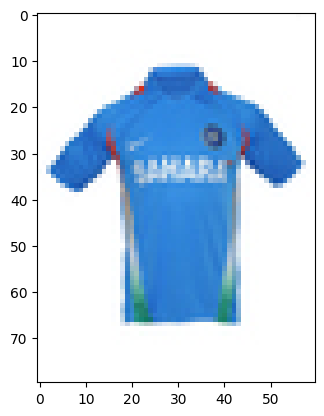

In [17]:
import cv2
import matplotlib.pyplot as plt

# Example to check image loading
def check_image_loading(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Unable to load image at {image_path}")
    else:
        # Convert BGR to RGB for displaying with matplotlib
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()

# Test with one image
check_image_loading('archive2/deepfashion2/images/1164.jpg')


In [18]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import cv2
import os
def load_data(image_dir, csv_file, image_size=(224, 224)):
    # Load annotations from CSV
    annotations_df = pd.read_csv(csv_file, on_bad_lines='skip')
    
    # Print columns to find the correct names
    print("Columns in the CSV file:", annotations_df.columns)
    
    images = []
    labels = []
    
    # Iterate over the DataFrame
    for _, row in annotations_df.iterrows():
        # Construct the image filename based on the 'id' column
        image_filename = f"{row['id']}.jpg"  # Adjust if your image filenames have a different extension or format
        image_path = os.path.join(image_dir, image_filename)  # Construct full path
        
        # Load image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to load image at {image_path}")
            continue
        
        # Resize image to the desired size
        image = cv2.resize(image, image_size)
        
        # Use a relevant column for the label; you might choose 'masterCategory', 'subCategory', etc.
        label = row['masterCategory']  # Adjust as needed
        
        # Print image and label for debugging
        print(f"Loaded image: {image_filename}, Label: {label}")
        
        # Append image and label
        images.append(image)
        labels.append(label)
    
    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

def load_data_subset(image_dir, csv_file, image_size=(224, 224), subset_size=100):
    images, labels = load_data(image_dir, csv_file, image_size)
    
    # Limit to subset size
    images = images[:subset_size]
    labels = labels[:subset_size]
    
    # Map labels to integers
    label_mapping = {label: idx for idx, label in enumerate(np.unique(labels))}
    print("Label mapping:", label_mapping)  # Print label mapping for debugging
    labels = np.array([label_mapping[label] for label in labels])
    
    # One-hot encode labels
    labels = to_categorical(labels)
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

# Test with a subset
X_train, X_test, y_train, y_test = load_data_subset('archive2/deepfashion2/images', 'archive2/deepfashion2/styles.csv', subset_size=100)


Columns in the CSV file: Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')
Loaded image: 15970.jpg, Label: Apparel
Loaded image: 39386.jpg, Label: Apparel
Loaded image: 59263.jpg, Label: Accessories
Loaded image: 21379.jpg, Label: Apparel
Loaded image: 53759.jpg, Label: Apparel
Loaded image: 1855.jpg, Label: Apparel
Loaded image: 30805.jpg, Label: Apparel
Loaded image: 26960.jpg, Label: Apparel
Loaded image: 29114.jpg, Label: Accessories
Loaded image: 30039.jpg, Label: Accessories
Loaded image: 9204.jpg, Label: Footwear
Loaded image: 48123.jpg, Label: Accessories
Loaded image: 18653.jpg, Label: Footwear
Loaded image: 47957.jpg, Label: Accessories
Loaded image: 46885.jpg, Label: Footwear
Loaded image: 12369.jpg, Label: Apparel
Loaded image: 29928.jpg, Label: Accessories
Loaded image: 42419.jpg, Label: Apparel
Loaded image: 51832.jpg, Label: Apparel
Loaded image: 47359.jpg, L

[ WARN:0@31.063] global loadsave.cpp:241 findDecoder imread_('archive2/deepfashion2/images/39403.jpg'): can't open/read file: check file path/integrity


Loaded image: 44266.jpg, Label: Accessories
Loaded image: 4093.jpg, Label: Apparel
Loaded image: 11858.jpg, Label: Footwear
Loaded image: 36646.jpg, Label: Accessories
Loaded image: 52303.jpg, Label: Accessories
Loaded image: 57671.jpg, Label: Personal Care
Loaded image: 24383.jpg, Label: Apparel
Loaded image: 25251.jpg, Label: Accessories
Loaded image: 11064.jpg, Label: Apparel
Loaded image: 41714.jpg, Label: Footwear
Loaded image: 31463.jpg, Label: Apparel
Loaded image: 22848.jpg, Label: Footwear
Loaded image: 49579.jpg, Label: Footwear
Loaded image: 55126.jpg, Label: Personal Care
Loaded image: 27506.jpg, Label: Apparel
Loaded image: 13733.jpg, Label: Apparel
Loaded image: 43043.jpg, Label: Apparel
Loaded image: 2364.jpg, Label: Accessories
Loaded image: 51586.jpg, Label: Apparel
Loaded image: 22074.jpg, Label: Apparel
Loaded image: 7616.jpg, Label: Accessories
Loaded image: 46531.jpg, Label: Accessories
Loaded image: 34111.jpg, Label: Apparel
Loaded image: 17393.jpg, Label: Accesso

[ WARN:0@35.126] global loadsave.cpp:241 findDecoder imread_('archive2/deepfashion2/images/39410.jpg'): can't open/read file: check file path/integrity


Loaded image: 5199.jpg, Label: Apparel
Loaded image: 11880.jpg, Label: Footwear
Loaded image: 59733.jpg, Label: Apparel
Loaded image: 21629.jpg, Label: Apparel
Loaded image: 1539.jpg, Label: Apparel
Loaded image: 4877.jpg, Label: Apparel
Loaded image: 25289.jpg, Label: Accessories
Loaded image: 22890.jpg, Label: Footwear
Loaded image: 8686.jpg, Label: Accessories
Loaded image: 12639.jpg, Label: Apparel
Loaded image: 35827.jpg, Label: Footwear
Loaded image: 18303.jpg, Label: Apparel
Loaded image: 9754.jpg, Label: Apparel
Loaded image: 30569.jpg, Label: Accessories
Loaded image: 48473.jpg, Label: Apparel
Loaded image: 23942.jpg, Label: Footwear
Loaded image: 29444.jpg, Label: Accessories
Loaded image: 42975.jpg, Label: Apparel
Loaded image: 16299.jpg, Label: Apparel
Loaded image: 28596.jpg, Label: Accessories
Loaded image: 27182.jpg, Label: Apparel
Loaded image: 26050.jpg, Label: Apparel
Loaded image: 12265.jpg, Label: Apparel
Loaded image: 42515.jpg, Label: Apparel
Loaded image: 3632.jp

[ WARN:0@42.470] global loadsave.cpp:241 findDecoder imread_('archive2/deepfashion2/images/39401.jpg'): can't open/read file: check file path/integrity


Loaded image: 13952.jpg, Label: Apparel
Loaded image: 50209.jpg, Label: Accessories
Loaded image: 28313.jpg, Label: Footwear
Loaded image: 22629.jpg, Label: Apparel
Loaded image: 12880.jpg, Label: Footwear
Loaded image: 18586.jpg, Label: Accessories
Loaded image: 49324.jpg, Label: Accessories
Loaded image: 8003.jpg, Label: Apparel
Loaded image: 7877.jpg, Label: Footwear
Loaded image: 11639.jpg, Label: Accessories
Loaded image: 36827.jpg, Label: Apparel
Loaded image: 21890.jpg, Label: Apparel
Loaded image: 20942.jpg, Label: Footwear
Loaded image: 58858.jpg, Label: Accessories
Loaded image: 38181.jpg, Label: Accessories
Loaded image: 15299.jpg, Label: Footwear
Loaded image: 41975.jpg, Label: Apparel
Loaded image: 57810.jpg, Label: Apparel
Loaded image: 39295.jpg, Label: Footwear
Loaded image: 15863.jpg, Label: Footwear
Loaded image: 56338.jpg, Label: Accessories
Loaded image: 24718.jpg, Label: Footwear
Loaded image: 38347.jpg, Label: Apparel
Loaded image: 52798.jpg, Label: Accessories
Lo

[ WARN:0@44.405] global loadsave.cpp:241 findDecoder imread_('archive2/deepfashion2/images/39425.jpg'): can't open/read file: check file path/integrity


Loaded image: 6943.jpg, Label: Apparel
Loaded image: 18560.jpg, Label: Footwear
Loaded image: 13188.jpg, Label: Footwear
Loaded image: 7891.jpg, Label: Apparel
Loaded image: 47258.jpg, Label: Apparel
Loaded image: 12866.jpg, Label: Footwear
Loaded image: 35678.jpg, Label: Footwear
Loaded image: 29227.jpg, Label: Footwear
Loaded image: 18752.jpg, Label: Apparel
Loaded image: 30138.jpg, Label: Apparel
Loaded image: 9305.jpg, Label: Apparel
Loaded image: 48022.jpg, Label: Accessories
Loaded image: 42518.jpg, Label: Apparel
Loaded image: 29829.jpg, Label: Apparel
Loaded image: 46984.jpg, Label: Accessories
Loaded image: 19680.jpg, Label: Apparel
Loaded image: 34598.jpg, Label: Apparel
Loaded image: 30904.jpg, Label: Apparel
Loaded image: 29015.jpg, Label: Apparel
Loaded image: 59362.jpg, Label: Apparel
Loaded image: 21278.jpg, Label: Accessories
Loaded image: 39287.jpg, Label: Footwear
Loaded image: 15871.jpg, Label: Footwear
Loaded image: 5194.jpg, Label: Apparel
Loaded image: 37741.jpg, 

[ WARN:0@46.217] global loadsave.cpp:241 findDecoder imread_('archive2/deepfashion2/images/12347.jpg'): can't open/read file: check file path/integrity


Loaded image: 1611.jpg, Label: Apparel
Loaded image: 40536.jpg, Label: Accessories
Loaded image: 45282.jpg, Label: Accessories
Loaded image: 36770.jpg, Label: Accessories
Loaded image: 52235.jpg, Label: Apparel
Loaded image: 14420.jpg, Label: Footwear
Loaded image: 20615.jpg, Label: Accessories
Loaded image: 5077.jpg, Label: Accessories
Loaded image: 25367.jpg, Label: Apparel
Loaded image: 56695.jpg, Label: Apparel
Loaded image: 11152.jpg, Label: Accessories
Loaded image: 39738.jpg, Label: Footwear
Loaded image: 10080.jpg, Label: Footwear
Loaded image: 57747.jpg, Label: Personal Care
Loaded image: 27430.jpg, Label: Apparel
Loaded image: 13605.jpg, Label: Apparel
Loaded image: 43175.jpg, Label: Accessories
Loaded image: 2252.jpg, Label: Apparel
Loaded image: 30487.jpg, Label: Apparel
Loaded image: 8768.jpg, Label: Accessories
Loaded image: 31555.jpg, Label: Footwear
Loaded image: 55010.jpg, Label: Personal Care
Loaded image: 34027.jpg, Label: Apparel
Loaded image: 28478.jpg, Label: Appa

In [ ]:
#images, labels = load_data(image_dir, csv_file)

Columns in the CSV file: Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


[ WARN:0@623.627] global loadsave.cpp:241 findDecoder imread_('/Users/lingesh_08/Desktop/VS CODE/archive2/deepfashion2/images/39403.jpg'): can't open/read file: check file path/integrity


[ WARN:0@627.972] global loadsave.cpp:241 findDecoder imread_('/Users/lingesh_08/Desktop/VS CODE/archive2/deepfashion2/images/39410.jpg'): can't open/read file: check file path/integrity


: 

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [20]:
#from tensorflow.keras.utils import to_categorical

In [21]:
# Normalize images
#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0

In [22]:
import cv2
import tensorflow_hub as hub

In [23]:
# Object Detection Model
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'mobilenet_iter_73000.caffemodel')

# Scene Classification Model
model = hub.load('https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4')

In [24]:
def detect_objects(frame):
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()

    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * [w, h, w, h]
            (startX, startY, endX, endY) = box.astype("int")
            label = "Object"
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(frame, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return frame

def classify_scene(frame):
    img = cv2.resize(frame, (299, 299))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    features = model(img)
    return "Scene Label"

In [25]:
cap = cv2.VideoCapture('vid.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Object detection
    frame = detect_objects(frame)

    # Scene classification
    scene_label = classify_scene(frame)

    # Display results
    cv2.putText(frame, scene_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

2024-08-18 01:13:54.698 Python[3034:3060424] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [26]:
from googletrans import Translator

translator = Translator()

def translate_label(label, target_language):
    translation = translator.translate(label, dest=target_language)
    return translation.text


In [27]:
def detect_and_translate(image, target_language='es'):
    detected_objects = detect_objects(image)
    translated_labels = [(translate_label(label, target_language), prob) for (label, prob) in detected_objects]
    
    # Annotate image
    for idx, (label, prob) in enumerate(translated_labels):
        cv2.putText(image, f"{label}: {prob:.2f}", (10, 30 * (idx + 1)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    return image


In [31]:
def detect_and_translate(image, target_language='es'):
    detected_objects = detect_objects(image)
    
    # Debugging: Print detected objects to understand their structure
    print(detected_objects)
    
    # Adjust based on the structure
    translated_labels = []
    for detected_object in detected_objects:
        if len(detected_object) == 2:
            label, prob = detected_object
            translated_label = translate_label(label, target_language)
            translated_labels.append((translated_label, label, prob))
        elif len(detected_object) == 3:
            label, prob, _ = detected_object  # Adjust based on what the third element represents
            translated_label = translate_label(label, target_language)
            translated_labels.append((translated_label, label, prob))
        else:
            # Handle cases with different lengths if needed
            pass
    
    # Annotate image
    for idx, (translated_label, original_label, prob) in enumerate(translated_labels):
        cv2.putText(image, f"{translated_label} ({original_label}): {prob:.2f}", (10, 30 * (idx + 1)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    return image


In [32]:
cap = cv2.VideoCapture('vid.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detect and translate object labels
    translated_frame = detect_and_translate(frame, target_language='fr')  # Change 'fr' to the desired language code

    # Display the resulting frame
    cv2.imshow('Multilingual Object Detection', translated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[[[150 159 192]
  [150 159 192]
  [150 159 192]
  ...
  [161 182 222]
  [161 182 222]
  [161 182 222]]

 [[150 159 192]
  [150 159 192]
  [150 159 192]
  ...
  [161 182 222]
  [161 182 222]
  [161 182 222]]

 [[150 159 192]
  [150 159 192]
  [150 159 192]
  ...
  [161 182 222]
  [161 182 222]
  [161 182 222]]

 ...

 [[ 59  47  89]
  [ 60  48  90]
  [ 61  49  91]
  ...
  [122 107 138]
  [134 119 151]
  [129 113 145]]

 [[ 58  44  90]
  [ 61  47  94]
  [ 61  47  94]
  ...
  [120 105 137]
  [129 113 145]
  [132 117 148]]

 [[ 60  46  93]
  [ 62  48  95]
  [ 61  47  94]
  ...
  [117 102 133]
  [124 109 140]
  [132 117 148]]]
[[[150 159 192]
  [150 159 192]
  [150 159 192]
  ...
  [161 182 222]
  [161 182 222]
  [161 182 222]]

 [[150 159 192]
  [150 159 192]
  [150 159 192]
  ...
  [161 182 222]
  [161 182 222]
  [161 182 222]]

 [[150 159 192]
  [150 159 192]
  [150 159 192]
  ...
  [161 182 222]
  [161 182 222]
  [161 182 222]]

 ...

 [[ 59  47  89]
  [ 60  48  90]
  [ 61  49  91]
  ..